In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from scipy.stats import mode
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
#importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib



In [2]:
df = pd.read_csv('database.csv', low_memory=False)

In [3]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [5]:
def col_names(col):
    col = col.strip()
    col = col.replace(" ", "_") 
    col = col.lower()
    return col
df.columns = [col_names(c) for c in df.columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   record_id              638454 non-null  int64 
 1   agency_code            638454 non-null  object
 2   agency_name            638454 non-null  object
 3   agency_type            638454 non-null  object
 4   city                   638454 non-null  object
 5   state                  638454 non-null  object
 6   year                   638454 non-null  int64 
 7   month                  638454 non-null  object
 8   incident               638454 non-null  int64 
 9   crime_type             638454 non-null  object
 10  crime_solved           638454 non-null  object
 11  victim_sex             638454 non-null  object
 12  victim_age             638454 non-null  int64 
 13  victim_race            638454 non-null  object
 14  victim_ethnicity       638454 non-null  object
 15  

In [7]:
(df.values == ' ').sum() 

1

In [8]:
df.replace(' ', '0', inplace=True)

In [9]:
df['perpetrator_age'] = df['perpetrator_age'].replace(' ', '0')

In [10]:
df['perpetrator_age'] = pd.to_numeric(df['perpetrator_age'])

In [11]:
df.head()

,record_id,agency_code,agency_name,agency_type,city,state,year,month,incident,crime_type,...,victim_ethnicity,perpetrator_sex,perpetrator_age,perpetrator_race,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count,record_source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [12]:
df = df.replace('Unknown', np.NAN)
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155851 entries, 44 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   record_id              155851 non-null  int64 
 1   agency_code            155851 non-null  object
 2   agency_name            155851 non-null  object
 3   agency_type            155851 non-null  object
 4   city                   155851 non-null  object
 5   state                  155851 non-null  object
 6   year                   155851 non-null  int64 
 7   month                  155851 non-null  object
 8   incident               155851 non-null  int64 
 9   crime_type             155851 non-null  object
 10  crime_solved           155851 non-null  object
 11  victim_sex             155851 non-null  object
 12  victim_age             155851 non-null  int64 
 13  victim_race            155851 non-null  object
 14  victim_ethnicity       155851 non-null  object
 15 

In [14]:
df.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155851 entries, 44 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   record_id              155851 non-null  int64 
 1   agency_code            155851 non-null  object
 2   agency_name            155851 non-null  object
 3   agency_type            155851 non-null  object
 4   city                   155851 non-null  object
 5   state                  155851 non-null  object
 6   year                   155851 non-null  int64 
 7   month                  155851 non-null  object
 8   incident               155851 non-null  int64 
 9   crime_type             155851 non-null  object
 10  crime_solved           155851 non-null  object
 11  victim_sex             155851 non-null  object
 12  victim_age             155851 non-null  int64 
 13  victim_race            155851 non-null  object
 14  victim_ethnicity       155851 non-null  object
 15 

In [15]:
def cat_type():
    for i in df.colums():
        if df[i].dtype == 'object':
            df[i] = df[i].astype('category')

In [16]:
df.loc[(df['victim_race']== df['perpetrator_race']), 'same_race'] = 1

In [17]:
df['same_race'] = df['same_race'].fillna(0)

In [18]:
#limpando dados
def col_names(col):
    col = col.strip()
    col = col.replace(" ", "_") 
    col = col.lower()
    return col
df.columns = [col_names(c) for c in df.columns]

In [19]:
df['same_race'].value_counts(normalize=True)

1.0    0.872275
0.0    0.127725
Name: same_race, dtype: float64

In [20]:
solved_dic = {'Yes':1,'No':0}
df['solved'] = df['crime_solved'].map(solved_dic)

In [21]:
unsolved_dic = {'No':1,'Yes':0}
df['unsolved'] = df['crime_solved'].map(unsolved_dic)

In [22]:
df.head()

,record_id,agency_code,agency_name,agency_type,city,state,year,month,incident,crime_type,...,perpetrator_race,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count,record_source,same_race,solved,unsolved
44,45,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,November,4,Manslaughter by Negligence,...,Native American/Alaska Native,Not Hispanic,Wife,Drowning,0,0,FBI,1.0,1,0
52,53,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,1,Murder or Manslaughter,...,Black,Not Hispanic,Acquaintance,Handgun,0,0,FBI,1.0,1,0
53,54,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,2,Murder or Manslaughter,...,White,Not Hispanic,Husband,Handgun,0,0,FBI,1.0,1,0
54,55,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,3,Murder or Manslaughter,...,Black,Not Hispanic,Acquaintance,Handgun,0,1,FBI,1.0,1,0
58,59,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,September,41,Murder or Manslaughter,...,White,Not Hispanic,Father,Rifle,0,0,FBI,1.0,1,0


In [23]:
df['victim_count'].value_counts()

0     144686
1       8229
2       1867
3        560
4        234
5        100
6         49
7         40
9         40
8         36
10        10
Name: victim_count, dtype: int64

In [24]:
df['perpetrator_race'].value_counts()

White                            90094
Black                            61644
Asian/Pacific Islander            2718
Native American/Alaska Native     1395
Name: perpetrator_race, dtype: int64

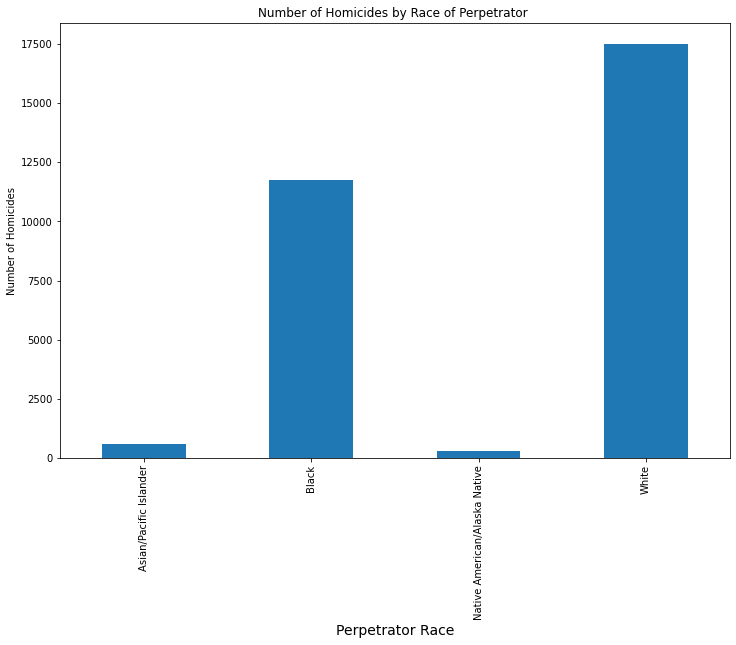

In [25]:
#raça da assassino
nperpetrator = df.groupby('perpetrator_race')['perpetrator_count'].sum()
ax = nperpetrator.plot(kind='bar', figsize=(12, 8), title='Number of Homicides by Race of Perpetrator ', grid=False)
ax.set_xlabel('Perpetrator Race', fontsize=14)
ax.set_ylabel('Number of Homicides');

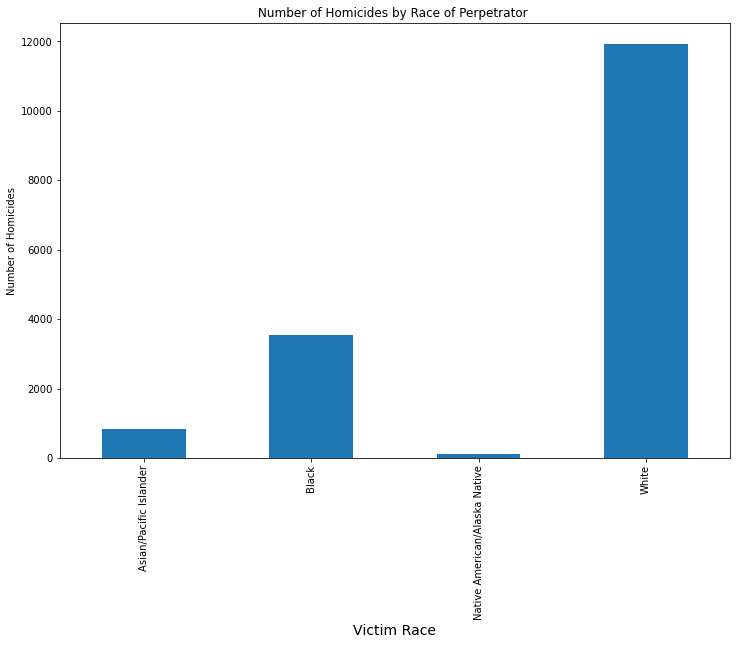

In [26]:
#raça da vítima
nvitima = df.groupby('victim_race')['victim_count'].sum()
ax = nvitima.plot(kind='bar', figsize=(12, 8), title='Number of Homicides by Race of Perpetrator ', grid=False)
ax.set_xlabel('Victim Race', fontsize=14)
ax.set_ylabel('Number of Homicides');

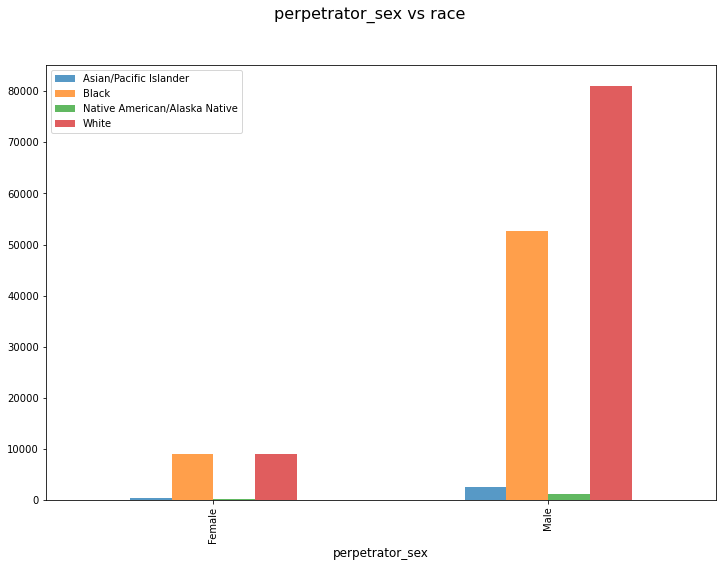

In [27]:
# perpetrator
# sex by race
fig, ax = plt.subplots(figsize=(12,8))
df.groupby(['perpetrator_sex', 'perpetrator_race'])['perpetrator_race'].count().unstack().plot(ax=ax, kind='bar', alpha=0.75, legend=True)
fig.suptitle('perpetrator_sex vs race', fontsize=16)
plt.xlabel('perpetrator_sex', fontsize=12)
L=plt.legend()

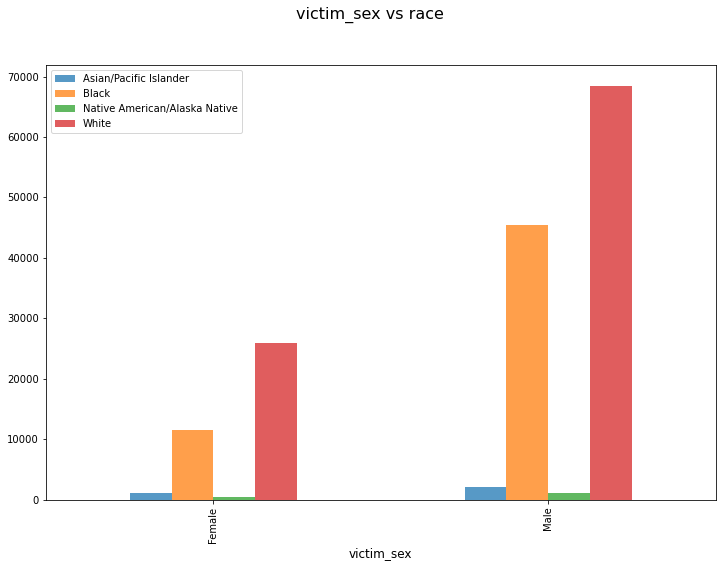

In [28]:
#victim
# sex by race
fig, ax = plt.subplots(figsize=(12,8))
df.groupby(['victim_sex', 'victim_race'])['victim_race'].count().unstack().plot(ax=ax, kind='bar', alpha=0.75, legend=True)
fig.suptitle('victim_sex vs race', fontsize=16)
plt.xlabel('victim_sex', fontsize=12)
L=plt.legend()

In [29]:
sex_race_df = df.groupby(['perpetrator_sex', 'perpetrator_race'])['perpetrator_race'].count()
# sex_race_df.plot.pie(title="Perpetrator Sex & Race", legend=False, autopct='%1.1f%%', startangle=0, figsize=(12,12), pctdistance=1.2, labeldistance=1.3)

In [30]:
sex_race_df

perpetrator_sex  perpetrator_race             
Female           Asian/Pacific Islander             264
                 Black                             8959
                 Native American/Alaska Native      217
                 White                             8931
Male             Asian/Pacific Islander            2454
                 Black                            52685
                 Native American/Alaska Native     1178
                 White                            81163
Name: perpetrator_race, dtype: int64

In [31]:
df['perpetrator_race'].value_counts()

White                            90094
Black                            61644
Asian/Pacific Islander            2718
Native American/Alaska Native     1395
Name: perpetrator_race, dtype: int64

In [32]:
df['victim_race'].value_counts()

White                            94375
Black                            56921
Asian/Pacific Islander            3114
Native American/Alaska Native     1441
Name: victim_race, dtype: int64

In [33]:
#perpetrator_race
nativeRace = df[df['perpetrator_race']=='Native American/Alaska Native']
whiteRace = df[df['perpetrator_race']=='White']
unknownRace = df[df['perpetrator_race']=='Unknown']
blackRace = df[df['perpetrator_race']=='Black']
asianRace = df[df['perpetrator_race']=='Asian/Pacific Islander']

In [34]:
pct_year_native = nativeRace.groupby(['year']).size()
pct_year_white = whiteRace.groupby(['year']).size() 
pct_year_unknown = unknownRace.groupby(['year']).size()
pct_year_black = blackRace.groupby(['year']).size() 
pct_year_asian = asianRace.groupby(['year']).size() 

Text(0.5, 0, 'Ano')

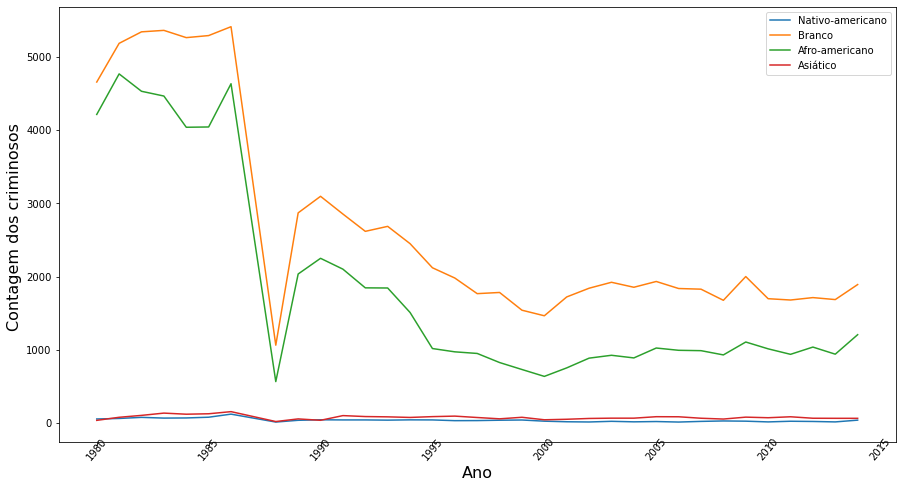

In [35]:
plt.figure(figsize=(15,8))
plt.plot(pct_year_native.index, pct_year_native, label='Nativo-americano')
plt.plot(pct_year_white.index, pct_year_white, label= 'Branco')
#plt.plot(pct_year_unknown.index, pct_year_unknown, label= 'Desconhecido')
plt.plot(pct_year_black.index, pct_year_black, label= 'Afro-americano')
plt.plot(pct_year_asian.index, pct_year_asian, label= 'Asiático')
plt.xticks(rotation=50, verticalalignment = 'center')
plt.title('', fontsize=20)
plt.legend()
plt.ylabel('Contagem dos criminosos ', fontsize=16)
plt.xlabel('Ano', fontsize=16)
# plt.grid()

Text(0.5, 0, 'Ano')

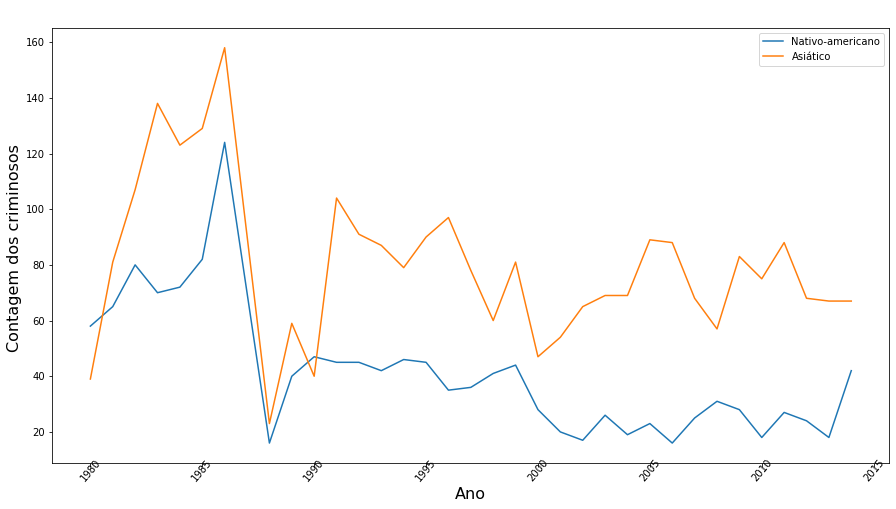

In [36]:
#perpetrator_race
#asian/native
plt.figure(figsize=(15,8))
plt.plot(pct_year_native.index, pct_year_native, label='Nativo-americano')
plt.plot(pct_year_asian.index, pct_year_asian, label= 'Asiático')
plt.xticks(rotation=50, verticalalignment = 'center')
plt.title(' ', fontsize=20)
plt.legend()
plt.ylabel('Contagem dos criminosos ', fontsize=16)
plt.xlabel('Ano', fontsize=16)
# plt.grid()

Text(0.5, 0, 'Ano')

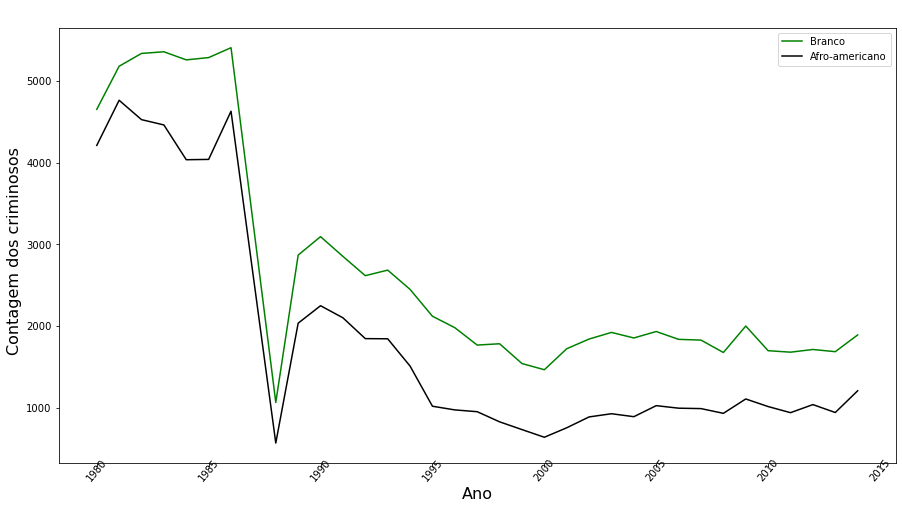

In [56]:
#white/black
plt.figure(figsize=(15,8))
plt.plot(pct_year_white.index, pct_year_white, label= 'Branco', color = 'green')
plt.plot(pct_year_black.index, pct_year_black, label= 'Afro-americano', color = 'black')
plt.xticks(rotation=50, verticalalignment = 'center')
plt.title(' ', fontsize=20)
plt.legend()
plt.ylabel('Contagem dos criminosos  ', fontsize=16)
plt.xlabel('Ano', fontsize=16)
# plt.grid()

In [38]:
#Vitima

In [39]:
sex1_race_df = df.groupby(['victim_sex', 'victim_race'])['victim_race'].count()

In [40]:
sex1_race_df

victim_sex  victim_race                  
Female      Asian/Pacific Islander            1068
            Black                            11469
            Native American/Alaska Native      380
            White                            25861
Male        Asian/Pacific Islander            2046
            Black                            45452
            Native American/Alaska Native     1061
            White                            68514
Name: victim_race, dtype: int64

In [41]:
df['victim_race'].value_counts()

White                            94375
Black                            56921
Asian/Pacific Islander            3114
Native American/Alaska Native     1441
Name: victim_race, dtype: int64

In [42]:
#victim_race
nativeRacee = df[df['victim_race']=='Native American/Alaska Native']
whiteRacee = df[df['victim_race']=='White']
unknownRacee = df[df['victim_race']=='Unknown']
blackRacee = df[df['victim_race']=='Black']
asianRacee = df[df['victim_race']=='Asian/Pacific Islander']

In [43]:
pct_year_nativee = nativeRacee.groupby(['year']).size()
pct_year_whitee = whiteRacee.groupby(['year']).size() 
pct_year_unknowne = unknownRacee.groupby(['year']).size()
pct_year_blacke = blackRacee.groupby(['year']).size() 
pct_year_asiane = asianRacee.groupby(['year']).size() 

Text(0.5, 0, 'Ano')

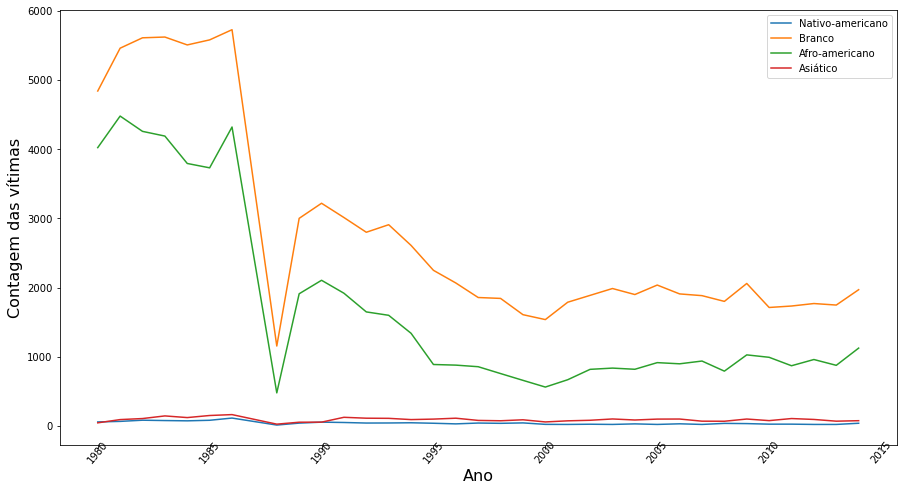

In [44]:
plt.figure(figsize=(15,8))
plt.plot(pct_year_nativee.index, pct_year_nativee, label='Nativo-americano')
plt.plot(pct_year_whitee.index, pct_year_whitee, label= 'Branco')
#plt.plot(pct_year_unknowne.index, pct_year_unknowne, label= 'Desconhecido')
plt.plot(pct_year_blacke.index, pct_year_blacke, label= 'Afro-americano')
plt.plot(pct_year_asiane.index, pct_year_asiane, label= 'Asiático')
plt.xticks(rotation=50, verticalalignment = 'center')
plt.title('', fontsize=20)
plt.legend()
plt.ylabel('Contagem das vítimas', fontsize=16)
plt.xlabel('Ano', fontsize=16)
# plt.grid()

Text(0.5, 0, 'Ano')

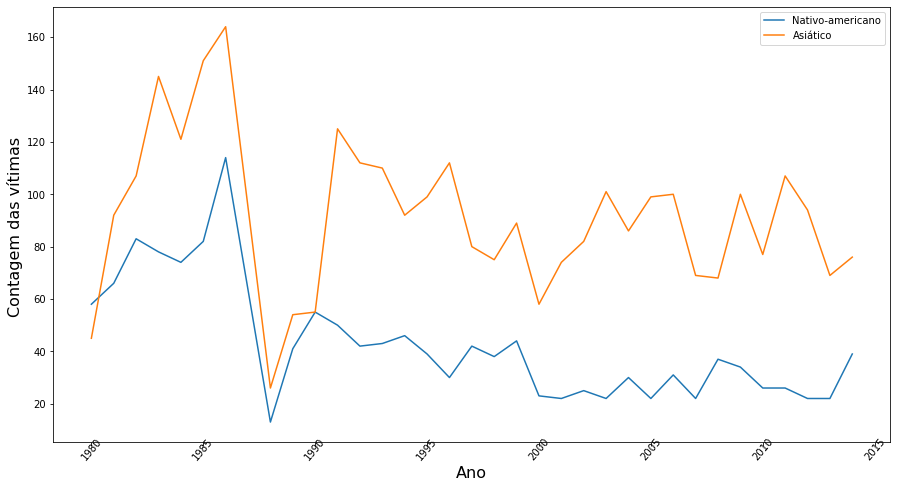

In [45]:
#native/asian
plt.figure(figsize=(15,8))
plt.plot(pct_year_nativee.index, pct_year_nativee, label='Nativo-americano')
plt.plot(pct_year_asiane.index, pct_year_asiane, label= 'Asiático')
plt.xticks(rotation=50, verticalalignment = 'center')
plt.title('', fontsize=20)
plt.legend()
plt.ylabel('Contagem das vítimas ', fontsize=16)
plt.xlabel('Ano', fontsize=16)
# plt.grid()

Text(0.5, 0, 'Ano')

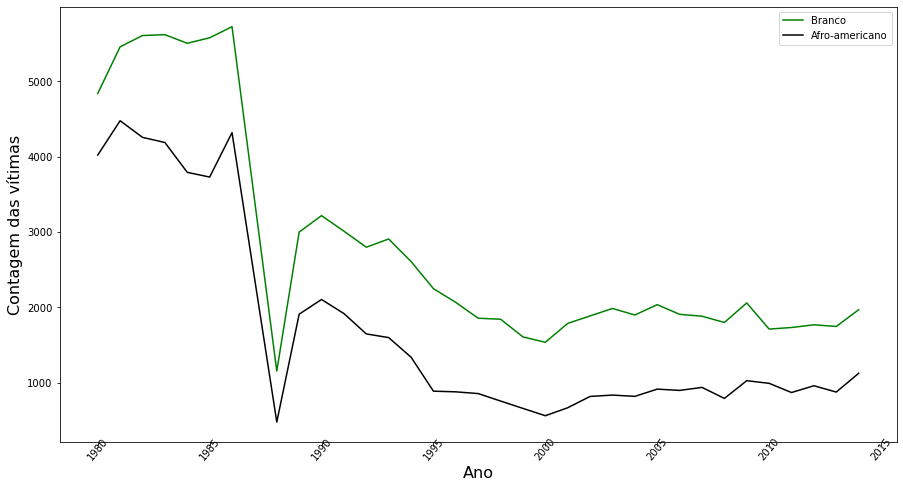

In [57]:
#black/white
plt.figure(figsize=(15,8))
plt.plot(pct_year_whitee.index, pct_year_whitee, label= 'Branco', color = 'green')
plt.plot(pct_year_blacke.index, pct_year_blacke, label= 'Afro-americano', color = 'black')
plt.xticks(rotation=50, verticalalignment = 'center')
plt.title('', fontsize=20)
plt.legend()
plt.ylabel('Contagem das vítimas', fontsize=16)
plt.xlabel('Ano', fontsize=16)
# plt.grid()

In [47]:
df['victim_count'].value_counts()

0     144686
1       8229
2       1867
3        560
4        234
5        100
6         49
7         40
9         40
8         36
10        10
Name: victim_count, dtype: int64

In [48]:
victyear= df.groupby(['year',])['victim_count'].count()

In [49]:
victyear

year
1980     8965
1981    10095
1982    10056
1983    10032
1984     9494
1985     9542
1986    10324
1988     1672
1989     5005
1990     5433
1991     5105
1992     4601
1993     4660
1994     4086
1995     3275
1996     3087
1997     2834
1998     2713
1999     2400
2000     2180
2001     2552
2002     2812
2003     2945
2004     2834
2005     3072
2006     2937
2007     2912
2008     2697
2009     3220
2010     2807
2011     2736
2012     2845
2013     2714
2014     3209
Name: victim_count, dtype: int64

In [50]:
#Os resultados apresentados a seguir referem-se aos números de vítimas entre os anos de 1980 e 2015

Text(0.5, 0, 'Ano')

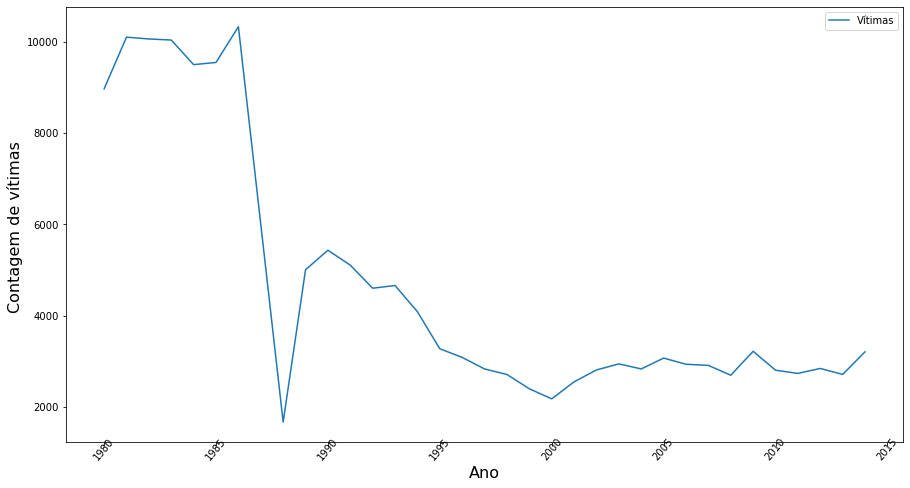

In [51]:
#native/asian
plt.figure(figsize=(15,8))
plt.plot(victyear.index, victyear, label='Vítimas')
plt.xticks(rotation=50, verticalalignment = 'center')
plt.title('', fontsize=20)
plt.legend()
plt.ylabel('Contagem de vítimas ', fontsize=16)
plt.xlabel('Ano', fontsize=16)
# plt.grid()

In [52]:
data = df[['victim_race','victim_sex','victim_count','perpetrator_count','perpetrator_race']]

C:\Users\pedri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


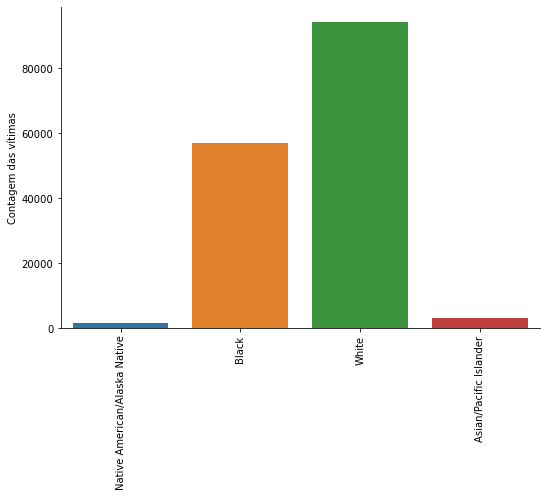

In [53]:
#vitima
g = sns.catplot("victim_race", data=data, aspect=1.5, kind="count")
plt.ylabel('Contagem das vítimas')
plt.xlabel('')
g.set_xticklabels(rotation=90)

C:\Users\pedri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


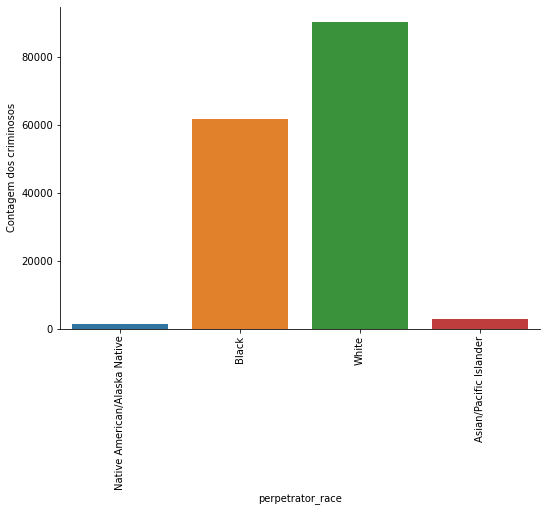

In [54]:
#assassino
g = sns.catplot("perpetrator_race", data=data, aspect=1.5, kind="count")
plt.ylabel('Contagem dos criminosos')
g.set_xticklabels(rotation=90)